# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [8]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [9]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [10]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [11]:
# Fetch current BTC price
btc_response = requests.get(btc_url)
btc_price = btc_response.json()['data']['1']['quotes']['CAD']['price']
print(f"Current btc price {btc_price}")

# Fetch current ETH pri
eth_response = requests.get(eth_url)
eth_price = eth_response.json()['data']['1027']['quotes']['CAD']['price']
print(f"Current eth price {eth_price}")

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

Current btc price 51671.5062
Current eth price 3505.011261
The current value of your 1.2 BTC is $62005.81
The current value of your 5.3 ETH is $18576.56


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [12]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [21]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

PKJ299O9FB9NI89Q38U4


In [43]:
# Format current date as ISO format
end_date = pd.Timestamp("2022-03-16", tz="America/New_York").isoformat()
start_date = pd.Timestamp("2018-03-16", tz="America/New_York").isoformat()
print(end_date)
# end_date = pd.Timestamp.now(tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
ticker_data = api.get_bars(
    tickers,
    timeframe=tradeapi.TimeFrame.Day,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Preview DataFrame
ticker_data['symbol'].describe()
# ticker_data.groupby(['symbol']).tail()

2022-03-16T00:00:00-04:00


count     1000
unique       1
top        AGG
freq      1000
Name: symbol, dtype: object

In [32]:
# Pick AGG and SPY close prices
agg_close_price = ticker_data['AGG']['close'][-1]
spy_close_price = ticker_data['SPY']['close'][-1]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

KeyError: 'AGG'

In [152]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21004.00
The current value of your 200 AGG shares is $21684.00


### Savings Health Analysis

In [153]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
consolidated_assets = {
    'amount': { 
        'crypto': my_btc_value + my_eth_value,
        'shares':  my_spy_value + my_agg_value
    },
}

# Create savings DataFrame
df_savings = pd.DataFrame(consolidated_assets)

# Display savings DataFrame
df_savings

,amount
crypto,77620.084911
shares,42688.000000


array([<AxesSubplot:ylabel='amount'>], dtype=object)

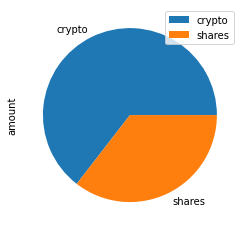

In [154]:
# Plot savings pie chart
df_savings.plot(kind="pie", subplots=True)

In [155]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings['amount'].sum()
# Testing data
# total_savings = 1000

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations, you have enough savings for emergency")
elif total_savings == emergency_fund:
    print("Congratulations, you have reached to your emergency fund goal")
else:
    print(f"You still need ${emergency_fund - total_savings :0.2F} to reach your emergency fund")

Congratulations, you have enough savings for emergency


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [156]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [157]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_stock_data.head()

/Users/guruprasadmulay/miniconda3/envs/alpacaenv/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecatedWarning: get_barset is deprecated as of v1.0.0. Use get_bars instead
  


AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                              SPY                                       
                             open    high     low    close      volume  
time                                                                    
2017-05-10 00:00:00-04:00     NaN     NaN     NaN      NaN         NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410  45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030  35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245  42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100  37206183.0

In [179]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# Set number of simulations
num_sims = 500
weights = [0.4,0.6]
# Configure a Monte Carlo simulation to forecast three years daily returns
MC = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    weights=weights,
    num_trading_days = 252*30
)

2

In [159]:
# Printing the simulation input data
MC.portfolio_data.head()

AGG                                       \
                             open      high     low   close     volume   
time                                                                     
2021-04-26 00:00:00-04:00  114.74  114.8015  114.65  114.65  2867784.0   
2021-04-27 00:00:00-04:00  115.13  115.1300  114.37  114.37  3421667.0   
2021-04-28 00:00:00-04:00  114.45  114.4685  114.20  114.44  6185936.0   
2021-04-29 00:00:00-04:00  114.14  114.3700  114.09  114.37  5796983.0   
2021-04-30 00:00:00-04:00  114.41  114.5150  114.33  114.50  5160765.0   

                                           SPY                            \
                          daily_return    open    high       low   close   
time                                                                       
2021-04-26 00:00:00-04:00    -0.000871  417.44  418.22  416.8111  417.64   
2021-04-27 00:00:00-04:00    -0.002442  417.91  418.14  416.3000  417.48   
2021-04-28 00:00:00-04:00     0.000612  417.81  419.01  416.9000  417.35   
2021-04-29 00:00:00-04:00    -0.000612  420.33  420.72  416.4400  419.98   
2021-04-30 00:00:00-04:00     0.001137  417.63  418.54  416.3400  417.30   

                                                    
                               volume daily_return  
time                                                
2021-04-26 00:00:00-04:00  44689009.0     0.002208  
2021-04-27 00:00:00-04:00  45962655.0    -0.000383  
2021-04-28 00:00:00-04:00  45533863.0    -0.000311  
2021-04-29 00:00:00-04:00  70595229.0     0.006302  
2021-04-30 00:00:00-04:00  73129109.0    -0.006381

In [160]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/guruprasadmulay/Desktop/Bootcamp/MONU-VIRT-FIN-PT-02-2022-U-LOL/Unit 5 - APIs/Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999546,1.009586,1.005730,1.001206,1.008859,1.003553,0.997783,1.012982,0.996350,0.995991,...,1.005095,1.000396,1.008041,0.998823,0.994122,0.988116,0.998009,0.993739,1.001725,0.991345
2,0.997839,1.010307,1.000517,1.002572,1.010742,1.006107,1.000623,1.008079,1.000547,0.988964,...,1.006038,0.995271,1.010691,0.992932,0.983543,0.996089,0.998705,0.996357,0.995964,0.981645
3,0.992956,1.020495,1.005887,1.009137,1.006681,1.003566,1.005117,1.011139,1.007627,0.994790,...,1.010836,0.979839,1.015582,0.990623,0.982393,1.005803,1.002137,0.994941,0.999064,0.984237
4,1.000321,1.020970,1.006023,1.011939,1.001066,1.015253,0.998968,1.004079,1.012074,0.997051,...,1.015211,0.970485,1.022153,0.992962,0.983039,1.003963,0.994506,0.997770,0.998552,0.981955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.836435,5.961187,10.002527,5.745261,4.539846,7.859121,10.890662,15.678894,12.507333,18.461608,...,5.972044,6.902851,4.579261,7.252036,8.078171,7.341824,3.978730,6.662027,10.904239,10.055239
7557,6.887670,5.953549,9.994073,5.818144,4.522154,7.920393,10.854371,15.697673,12.495804,18.469124,...,6.058780,6.869253,4.581117,7.202187,8.101976,7.360888,3.963053,6.629042,10.892899,9.962729
7558,6.906866,5.879212,10.073026,5.809973,4.498123,7.942473,10.913468,15.656811,12.561077,18.383701,...,6.041161,6.911982,4.579914,7.231051,8.102954,7.350444,3.932459,6.667890,10.822791,9.967067
7559,6.879813,5.910917,10.058908,5.823518,4.538602,7.905483,10.802884,15.748808,12.561405,18.328705,...,6.033977,6.889302,4.588903,7.232562,8.113590,7.372140,3.934896,6.675479,10.804493,9.979279


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

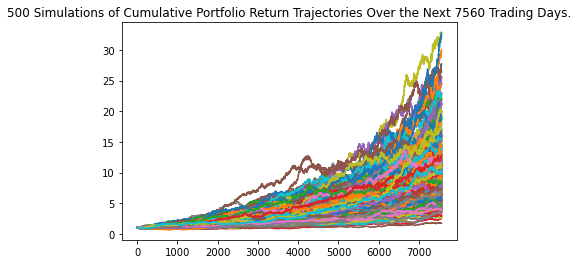

In [161]:
# Plot simulation outcomes
MC.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

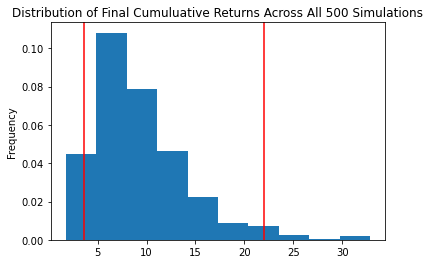

In [162]:
# Plot probability distribution and confidence intervals
MC.plot_distribution()

### Retirement Analysis

In [163]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = MC.summarize_cumulative_return()
# Print summary statistics
summary_stats

count           500.000000
mean              9.357816
std               4.834800
min               1.759349
25%               5.990055
50%               8.198951
75%              11.589237
max              32.829551
95% CI Lower      3.599054
95% CI Upper     21.985951
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [164]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_stats[8]*initial_investment,2)
ci_upper = round(summary_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $71981.08 and $439719.02


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [165]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary_stats[8]*initial_investment,2)
ci_upper = round(summary_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $107971.63 and $659578.53


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [166]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# Set number of simulations
num_sims = 500

# Configure a Monte Carlo simulation to forecast three years daily returns
MC_five_years = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    weights=weights,
    num_trading_days = 252*5
)

In [167]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/guruprasadmulay/Desktop/Bootcamp/MONU-VIRT-FIN-PT-02-2022-U-LOL/Unit 5 - APIs/Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003961,1.000378,1.001990,1.008998,1.012337,1.003986,0.997807,0.994664,0.997532,1.003651,...,1.000338,0.990527,0.995945,0.993367,1.008612,0.989121,0.997265,0.995301,0.998554,0.997156
2,1.005899,1.002109,1.009387,1.011329,1.003520,0.997748,0.990930,0.993811,0.987378,0.995674,...,1.005523,0.999438,0.987758,1.001527,1.007362,0.996380,0.997767,0.996427,1.000215,0.992683
3,1.008537,1.012407,1.023402,1.003518,1.006387,0.992417,0.999853,0.988328,0.987962,0.995197,...,1.005078,0.993981,0.978080,1.004344,1.008896,1.004632,1.001911,0.997829,0.999253,0.986519
4,1.008679,1.008471,1.027291,1.010924,1.009213,0.993020,1.017437,0.991395,0.991343,0.989625,...,1.003707,0.991788,0.979784,0.997896,1.011289,0.998184,1.014152,1.000636,1.009891,1.001096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.168936,1.469721,1.423531,1.886000,1.050174,1.277564,1.551228,1.170512,1.830817,1.648763,...,1.307222,1.558421,1.251068,1.128301,1.631838,1.529961,1.890111,1.702373,1.624404,1.217799
1257,1.180549,1.465656,1.421467,1.900676,1.060650,1.286645,1.548867,1.155367,1.821079,1.645949,...,1.312054,1.557839,1.240755,1.121330,1.632219,1.525266,1.886554,1.694421,1.633254,1.227210
1258,1.186495,1.474197,1.424761,1.904721,1.058439,1.292348,1.538757,1.164806,1.813541,1.654420,...,1.313935,1.536023,1.242065,1.121140,1.628508,1.520443,1.883598,1.688509,1.639540,1.224606
1259,1.185245,1.478467,1.429183,1.923777,1.055828,1.282405,1.548927,1.168249,1.812735,1.623928,...,1.317147,1.539770,1.249621,1.128109,1.639535,1.531484,1.877473,1.686525,1.648703,1.216255


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

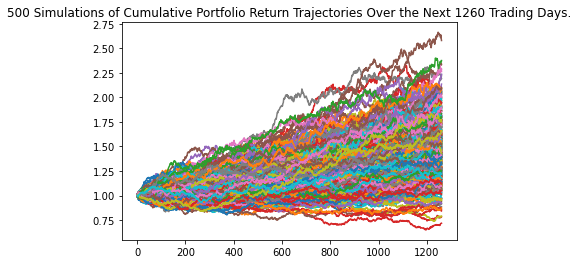

In [168]:
# Plot simulation outcomes
MC_five_years.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

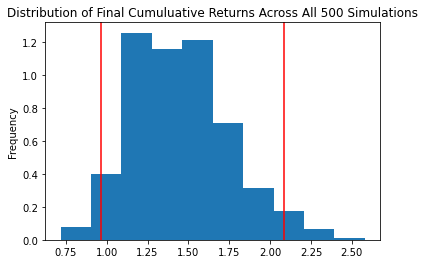

In [169]:
# Plot probability distribution and confidence intervals
MC_five_years.plot_distribution()

In [170]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_five_years_stats = MC_five_years.summarize_cumulative_return()
# Print summary statistics
MC_five_years_stats

count           500.000000
mean              1.450803
std               0.298193
min               0.717671
25%               1.223565
50%               1.427970
75%               1.631262
max               2.579188
95% CI Lower      0.963935
95% CI Upper      2.085226
Name: 1260, dtype: float64

In [171]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(MC_five_years_stats[8]*initial_investment,2)
ci_upper_five = round(MC_five_years_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57836.07 and $125113.54


### Ten Years Retirement Option

In [172]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
num_sims = 500

# Configure a Monte Carlo simulation to forecast three years daily returns
MC_ten_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights=weights,
    num_simulation = num_sims,
    num_trading_days = 252*10
)

# Print the simulation input data
MC_ten_years.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [173]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/guruprasadmulay/Desktop/Bootcamp/MONU-VIRT-FIN-PT-02-2022-U-LOL/Unit 5 - APIs/Homework/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009818,1.011233,0.997868,0.996512,1.006200,1.005005,0.999302,1.004410,1.005785,1.010216,...,0.995830,1.006329,1.013340,0.999041,1.009109,1.003159,0.999924,1.000784,0.991371,1.004220
2,1.011655,1.006996,1.003657,1.001703,1.010732,1.013520,1.006255,1.002693,1.010258,1.004309,...,0.995713,1.010313,1.009139,1.006027,1.006128,1.004225,0.999196,1.003141,1.002648,0.997463
3,1.016802,1.010113,0.998145,1.005300,1.017603,1.004826,1.013885,0.997572,1.014904,1.004081,...,0.991026,1.008749,1.008949,1.004956,1.002098,1.003053,0.996294,1.001309,1.000617,0.993083
4,1.023662,1.007690,1.007652,0.993326,1.018870,1.006628,1.020629,1.001042,1.005742,0.999788,...,1.001071,1.005241,1.003291,1.007775,1.008883,1.001675,0.995785,1.001650,1.004265,0.989438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.842953,1.700583,2.738930,3.283439,2.671219,2.028788,2.613942,1.753943,1.762696,1.830892,...,2.139376,3.040074,1.769672,1.721648,2.776370,1.905672,1.116731,1.983907,2.175053,1.758676
2517,1.839908,1.695805,2.739790,3.281103,2.688845,2.023706,2.617151,1.744225,1.767367,1.855408,...,2.125651,3.032719,1.771372,1.725077,2.752686,1.902759,1.120684,1.989192,2.174238,1.747592
2518,1.839884,1.710280,2.755385,3.282142,2.701891,2.033284,2.587908,1.738937,1.755909,1.853832,...,2.122125,3.022420,1.788102,1.720310,2.762432,1.901538,1.117968,1.985291,2.145395,1.748625
2519,1.828183,1.712093,2.752328,3.293121,2.708869,2.045012,2.584533,1.721891,1.750252,1.851392,...,2.134623,3.022515,1.777219,1.730266,2.762891,1.900512,1.120972,1.985555,2.154686,1.743740


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

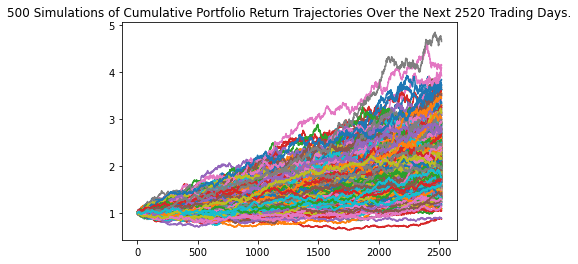

In [174]:
# Plot simulation outcomes
MC_ten_years.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

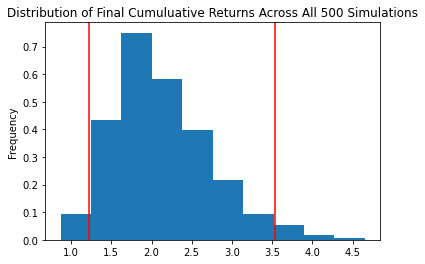

In [175]:
# Plot probability distribution and confidence intervals
MC_ten_years.plot_distribution()

In [176]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_ten_years_stats = MC_ten_years.summarize_cumulative_return()

# Print summary statistics
MC_ten_years_stats

count           500.000000
mean              2.121307
std               0.600018
min               0.868271
25%               1.717521
50%               2.017186
75%               2.480544
max               4.652721
95% CI Lower      1.219836
95% CI Upper      3.538247
Name: 2520, dtype: float64

In [177]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(MC_ten_years_stats[8]*initial_investment,2)
ci_upper_ten = round(MC_ten_years_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $73190.14 and $212294.83
